In [2]:
import pandas as pd
from apriori_python import apriori
import plotly.express as px 
import matplotlib.pyplot as plt 
import time
from efficient_apriori import apriori as ef_ap
from fpgrowth_py import fpgrowth
from sklearn import datasets
import seaborn as sns

In [3]:
# Считайте DataFrame, используя данные функции

attr_names = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME", "HISTOLOGY"]

df = pd.read_csv('data/hepatitis.data', names=attr_names)

df.head()


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [4]:
print(df.isnull().sum())
df.info()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    int64  
 3   STEROID          155 non-null    int64  
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          155 non-null    int64  
 6   MALAISE          155 non-null    int64  
 7   ANOREXIA         155 non-null    int64  
 8

In [5]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# scaler = StandardScaler()
# df = pd.DataFrame(data = scaler.fit_transform(df),
#                            columns = df.columns)
# 
# kmeans = KMeans(n_clusters = 4)
# cluster = kmeans.fit_predict(df)


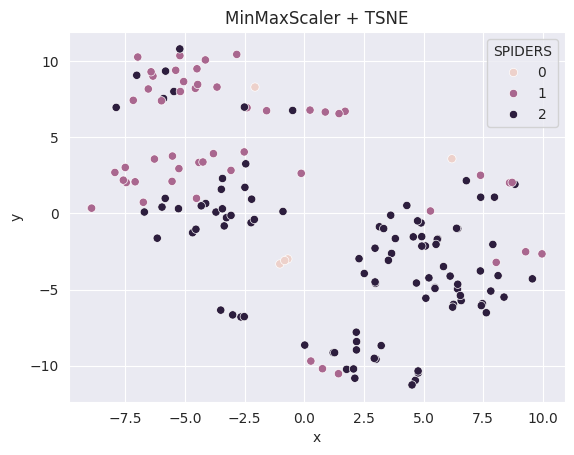

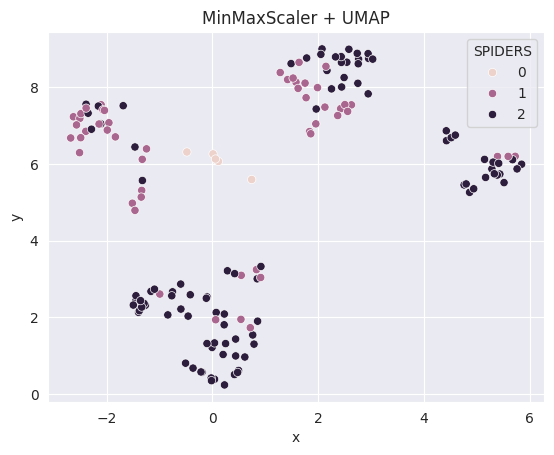

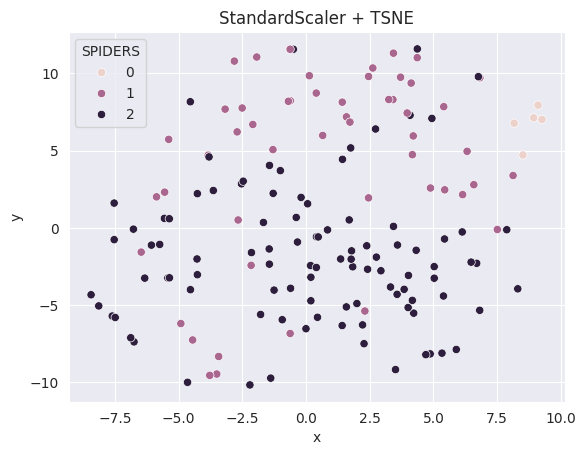

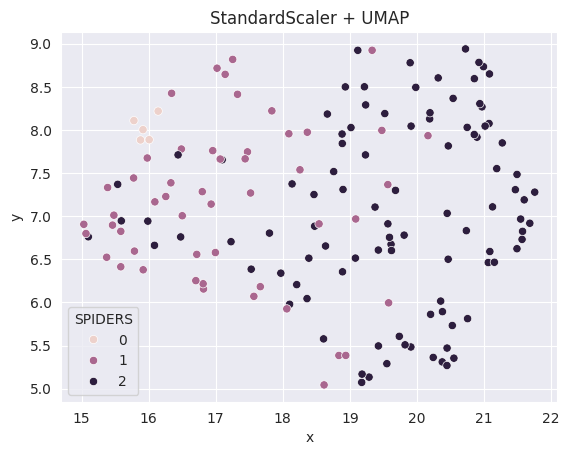

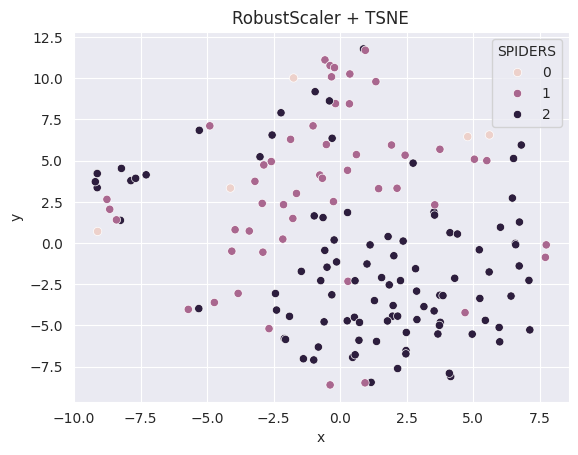

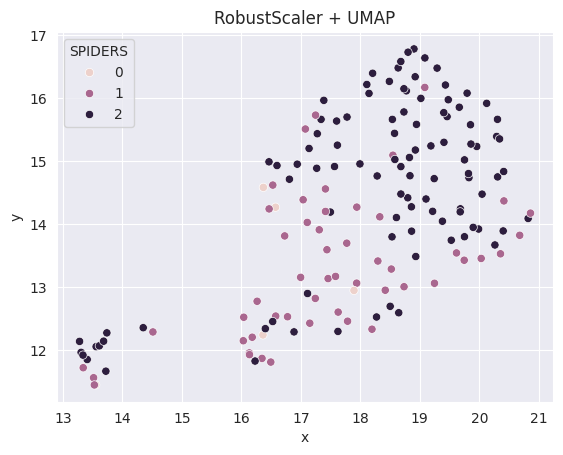

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap

scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
dim_reduction_methods = [TSNE(n_components=2), umap.UMAP(n_components=2)]

for scaler in scalers:
    scaled_data = scaler.fit_transform(df)
    
    for dim_reduction_method in dim_reduction_methods:
        reduced_data = dim_reduction_method.fit_transform(scaled_data)
        reduced_data_df = pd.DataFrame(reduced_data, columns=['x', 'y'])

        reduced_data_df['SPIDERS'] = df.SPIDERS

        sns.scatterplot(data=reduced_data_df, hue='SPIDERS', x='x', y='y')
        plt.title(f'{scaler.__class__.__name__} + {dim_reduction_method.__class__.__name__}')
        plt.show()
